# ***Introduction:***

---

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

### This data set has 768 rows and 9 columns, out of which 8 are input columns and one is output column.





### ***Attribute information:***


---

###1. Pregnancies: Number of times pregnant

###2. Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

###3. Blood Pressure: Diastolic blood pressure (mm Hg)

###4.  Skin Thickness: Triceps skin fold thickness (mm

###5. Insulin: 2-Hour serum insulin (mu U/ml)

###6. BMI: Body mass index (weight in kg/(height in m)^2) 

###7. Diabetes Pedigree Function: Diabetes pedigree function

###8. Age: Age (years)

###9. Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic



# **Importing important libraries:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing & reading file :**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mandatory_diabetes (1).csv to mandatory_diabetes (1) (1).csv


In [ ]:
db = pd.read_csv("mandatory_diabetes (1).csv")

## **Data cleaning:**

In [ ]:
# Finding information about the data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### So here we can see there is no Null enteries in the data. Here also python sees Outcome as integer type data but statistically it is categorical data.

In [ ]:
db.describe() #lets see statistical analysis of the data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### For many of the columns zero is the minimum value. But value zero is not possible for Glucose, Blood pressure, skin thickness, insulin & BMI.

In [ ]:
#Lets find the number of zero entries
(db.Glucose==0).sum(),(db.BloodPressure==0).sum(),(db.SkinThickness==0).sum(),(db.Insulin==0).sum(),(db.BMI==0).sum(),(db.Age==0).sum()

(5, 35, 227, 374, 11, 0)

### So there is high level of zero count in some variables.

### It would be better to remove the zeros instead of replacing them beacause the count is high so by replacing the zeros, data will give wrong analysis.

In [ ]:
# Lets find the index of required columns and list them
d1 = db.index[db.Glucose==0].tolist()
d2 = db.index[db.BloodPressure==0].tolist()
d3 = db.index[db.SkinThickness==0].tolist()
d4 = db.index[db.BMI==0].tolist()
d5 = db.index[db.Insulin==0].tolist()
x = d1+d2+d3+d4+d5  # Concat the lists
Diab = db.drop(db.index[x]) # droping the rows of specified index

In [ ]:
Diab.info()  # lets see the information of our new data set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


### So by cleaning the data we lost around 50% of out data. But the data is cleaner to analyse.

## **1. Basic Exploration of data:**

There are two Data types.

## **1. Qualitative data/Categorical data-**

This is has no magnitude. It is again of two types,

### **A. Nominal -**

It has no order and magnitude.

For example: Gender, Race, Name and ID

### **B. Ordinal-**

It has order but no magnitude.

We know one group is greater but not sure about magnitude



## **2. Quantitative data/Numerical data-**

This has order and magnitude. It is again devided in two parts,

###**A. Discerete -**

Intermediate values are not possible.

This data is countable.

For example: Population

###**3. Continous-**

Intermediate values are possible.

This data is measurable.

For example: Height, weight, Age

### **1.**Pregnancies: As this variable is countable, so it is discerete type data.



###**2.**Glucose,Blood Pressure, skin thickness , insulin , BMI all these variables are measured not counted.So these are all continous data.

###**3.**Also AGE here should be conisdered as Discrete data because it is expressed as an integer in units of years with no decimal to indicate days and presumably, hours, minutes, and seconds. 

###**4.**Diabetes Pedigree Function indicates the function which scores likelihood of diabetes based on family history.As this is also measured this is also a continous data

###**5.**However outcome is a Categorical data as this has no magnitude and order.


## **2. Central tendency for Glucose and Outcome:**

In [ ]:
#Let's chech the skewness of the plot of Glucose column
#So that we can understand which is the appropriate measure of central tendency for Glucose
Diab.Glucose.skew()

0.5178499371777541

### As the skewness is around 0.5, so we can say the Glucose data is normaly distributed. Thus Mean would be the appropriate measure of central tendency for Glucose.

In [ ]:
#Lets find the mean of Glucose column
Diab.Glucose.mean()

122.62755102040816

In [ ]:
# As Outcome is categorical thus Mode would be the appropriate measure of central tendency for outcome
Diab.Outcome.mode() #finfing mode

0    0
dtype: int64

### So cental tendency of Outcome is 0 , that is Non-Diabetic count is higher than the diabetic.

### **3. point data summaries:**

In [ ]:
#lets remove Outcome column  as it is categorical(No 5 point summary)
Diab1 = Diab[["Pregnancies" , "Glucose" , "BloodPressure" , 'SkinThickness' , "Insulin" , "BMI" , "DiabetesPedigreeFunction" ,  "Age"]] #Dropping unwanted columns
Diab1.describe() 
#Statistical analysis or five point summary of different columns except Outcome.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

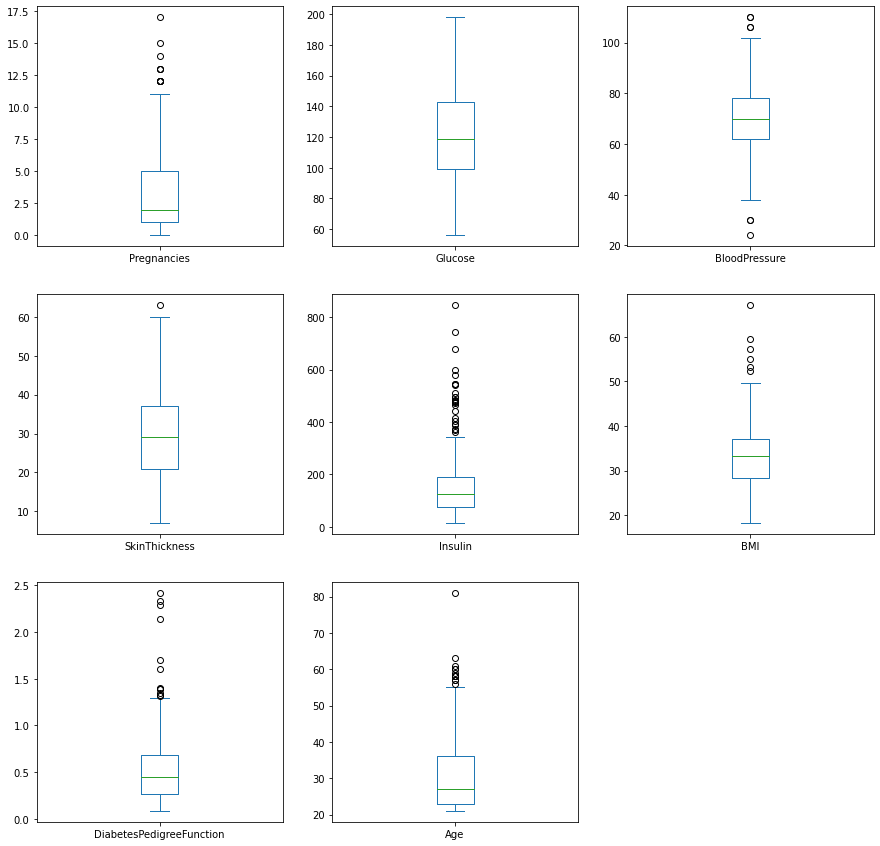

In [ ]:
#Let's Visualise the Max,Min,Mean,Mode,Median and also outliers using boxplot
Diab1.plot(kind='box', subplots=True, layout=(3,3),figsize=(15,15))
#Box summaries of columns.

## **4 .Distribution of outcome:**

Text(0.5, 0, 'Non-Diabetic or Diabetic')

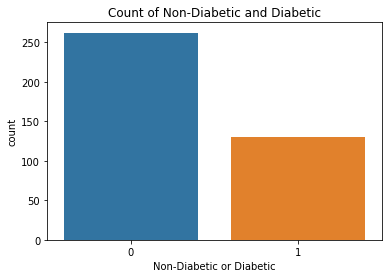

In [ ]:
sns.countplot(x = 'Outcome' , data=Diab) #creating countplot of outcome variable
plt.title("Count of Non-Diabetic and Diabetic")
plt.xlabel("Non-Diabetic or Diabetic")

0    262
1    130
Name: Outcome, dtype: int64


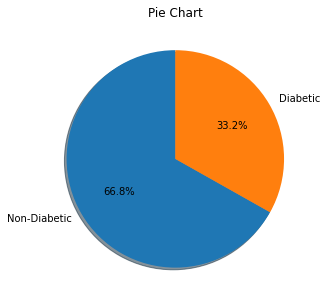

In [ ]:
# Counting total numbers in each category
count = Diab['Outcome'].value_counts()
# Checking the numbers
print(count)
# Creating categories based on numbers
DB = ['Non-Diabetic', 'Diabetic']
# Creating plot
fig = plt.figure(figsize =(10,5))
# Show plot
plt.pie(count, labels = DB,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Pie Chart")
plt.show()

### So from countplot as we can see, the count of 0's is more than the 1's.

### From pie chart we can see there are 66.8% Non-Diabetic and 33.2% diabetic.

## **5. Is there a difference in glucose level between diabetic and non-diabetic? Similarly for insulin and diabetic vs nondiabetic.**

Text(0.5, 0, 'Non-Diabetic or Diabetic')

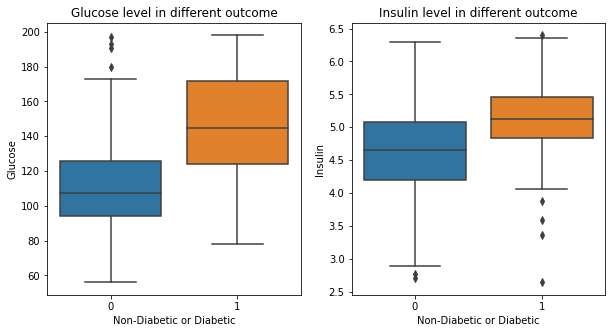

In [43]:
#Let's create a box plot to see the difference
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x= "Outcome" , y = "Glucose" , data= Diab)
plt.title("Glucose level in different outcome")
plt.xlabel("Non-Diabetic or Diabetic")
plt.subplot(1,2,2)
sns.boxplot(x= "Outcome" , y = "Insulin" , data = Diab)
plt.title("Insulin level in different outcome")
plt.xlabel("Non-Diabetic or Diabetic")

In [45]:
#lets subset the data by Outcome
dia1 = Diab[Diab.Outcome==1]  #data with Diabetic
dia0 = Diab[Diab.Outcome==0]  #data with nonDiabetic

In [52]:
diab1 = dia1[["Glucose", "Insulin"]] #droping unwanted columns
diab1.describe() #statistical analysis of glucose level and Insulin of Diabetic data

,Glucose,Insulin
count,130.000000,130.000000
mean,145.192308,5.141971
std,29.839388,0.593125
min,78.000000,2.639057
25%,124.250000,4.838258
50%,144.500000,5.123964
75%,171.750000,5.461650
max,198.000000,6.396930


In [54]:
diab0 = dia0[["Glucose", "Insulin"]]  #droping unwanted columns
diab0.describe()#statistical analysis of glucose level and Insulin of Non-Diabetic data

,Glucose,Insulin
count,262.000000,262.000000
mean,111.431298,4.629378
std,24.642133,0.651843
min,56.000000,2.708050
25%,94.000000,4.189655
50%,107.500000,4.653960
75%,126.000000,5.072029
max,197.000000,6.300786


### From above Boxplot and 5 point analysis, it's clear that the mean,50%,25%, and 75% of Glucose level and also Insulin is higher in case of Diabetic.


## **6. Relationship between insulin and glucose level:**

Text(0.5, 1.0, 'Relation between Insulin and Glucose level')

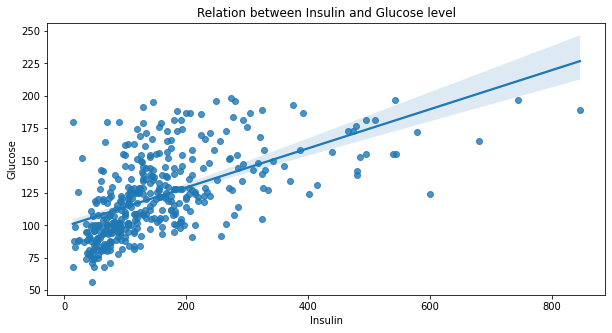

In [ ]:
# Both Insulin and Glucose level is Numerical data
#Thus let's use regplot to examine relationship between them
plt.figure(figsize=(10,5))
sns.regplot(x= "Insulin", y= "Glucose", data = Diab)
plt.title("Relation between Insulin and Glucose level")

In [ ]:
#Let's find correlation between Glucose and Insulin
np.corrcoef(Diab["Insulin"] , Diab["Glucose"])[0,1]  #used [0,1] to covert the matrix

0.5812230123542534

### From above Regplot graph also as the correlation coefficient between the Insulin and Glucose level is 0.5812 , so we can say they are positively correlated. However they are not linearly correlated.

## **7. Distribution of numerical data:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution plot for Insulin')

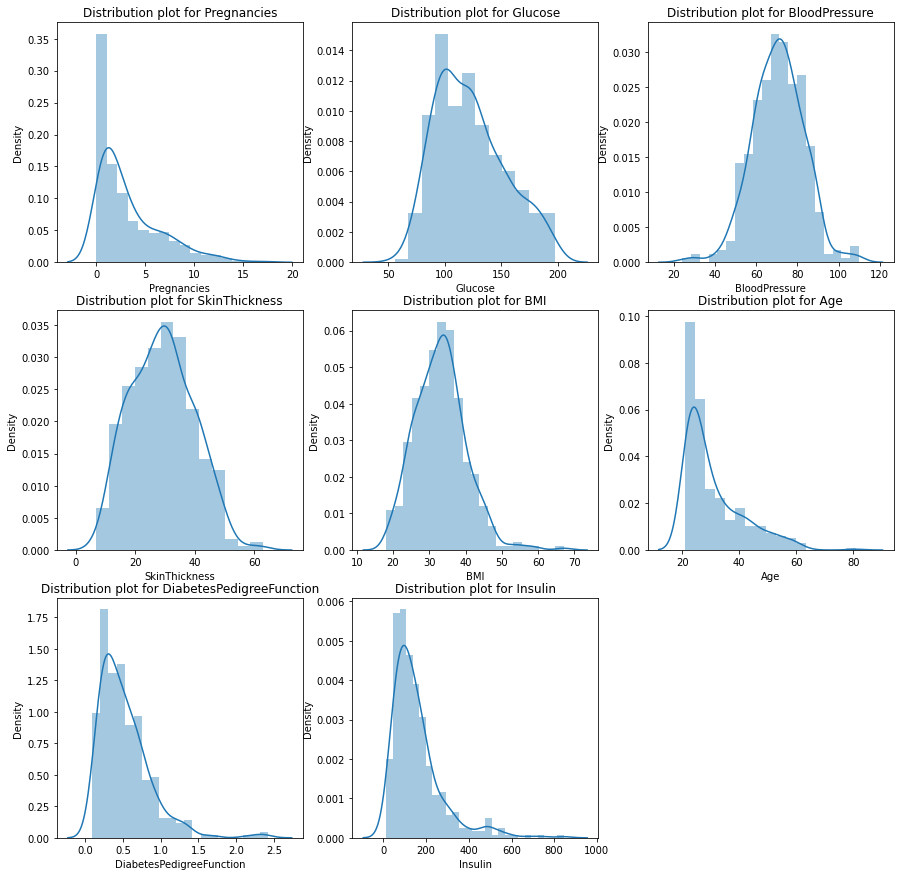

In [ ]:
#USing distplot to plot the density or distribution graph.
#using subplot function to plot multiple graphs
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.distplot(Diab1["Pregnancies"])
plt.title("Distribution plot for Pregnancies")
plt.subplot(3,3,2)
sns.distplot(Diab1["Glucose"])
plt.title("Distribution plot for Glucose")
plt.subplot(3,3,3)
sns.distplot(Diab1["BloodPressure"])
plt.title("Distribution plot for BloodPressure")
plt.subplot(3,3,4)
sns.distplot(Diab1["SkinThickness"])
plt.title("Distribution plot for SkinThickness")
plt.subplot(3,3,5)
sns.distplot(Diab1["BMI"])
plt.title("Distribution plot for BMI")
plt.subplot(3,3,6)
sns.distplot(Diab1["Age"])
plt.title("Distribution plot for Age")
plt.subplot(3,3,7)
sns.distplot(Diab1["DiabetesPedigreeFunction"])
plt.title("Distribution plot for DiabetesPedigreeFunction")
plt.subplot(3,3,8)
sns.distplot(Diab1["Insulin"])
plt.title("Distribution plot for Insulin")

### From the above distribution graphs,
###1. Glucose , Blood pressure , Skin thickness plots are symmetrrical.
###2. all other plots are positively skewed or right skewed.

## **8. Skewness value:**

In [ ]:
#Lets also find the skewness of all the variables
Diab1.skew()

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
dtype: float64

### From the skewness calculation,
###1. skewness of pregnancies, Insulin , DiabetesPedigreeFunction and age is greater than 1. so they are higly positively skewed.
###2. The skewness value of Glucose and BMI is between 0.5 and 1 , so they are moderately skewed.
###3. Skewness value of Blood pressure and skin thickness is around 0, thus they are normaly distributed.

## **9. Examining outliers:**

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

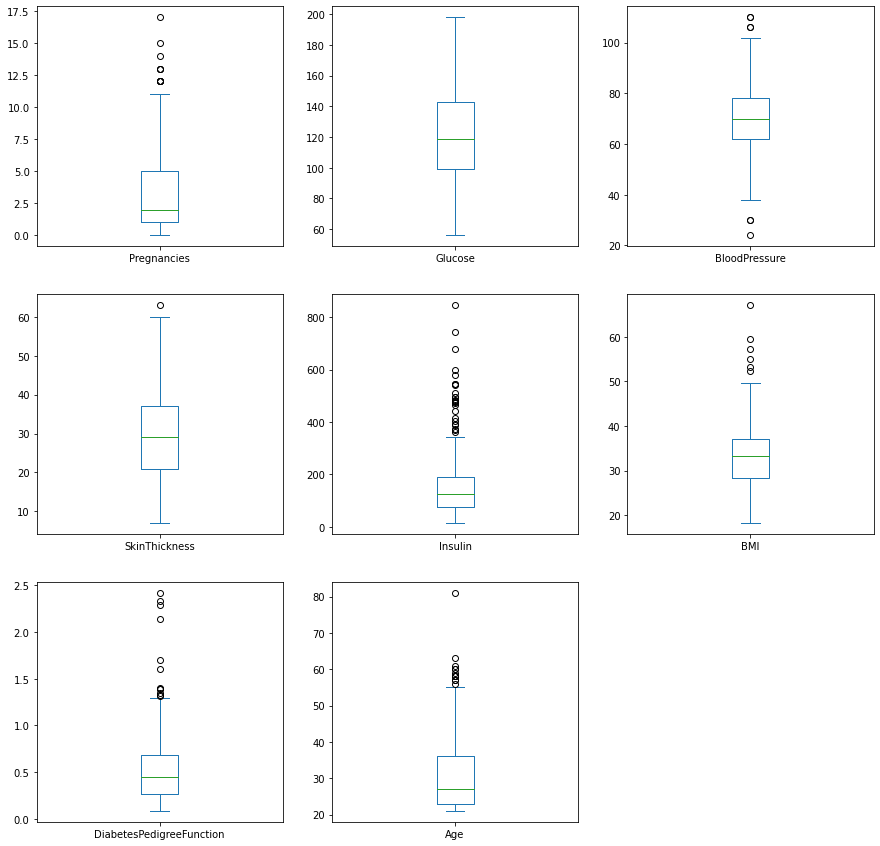

In [ ]:
#Let's use Box plot to see the outliers of our variables
Diab1.plot(kind='box', subplots=True, layout=(3,3),figsize=(15,15))
#using pplot function to plot all the columns at a time 

### As we can see form the avove there are some extreme outliers in pregnancies,insulin,BMI,Diabetic pedigree function and Age variables.

## **10. What should be the measures of central tendency and dispersion for skewed data?**

## 1.Pregnancies, Insulin , DiabetesPedigreeFunction and age columns are highly positively skewed. Thus median is the correct measure for central tendency.
##2. Glucose , Blood pressure and skin thickness plots are symmetrical or normaly distributed. Thus Mean is the correct measure for central tendency.
##3.BMI is moderately skewed, thus we can replace the missing values or outliers and can use mean as measure of cental tendency.
#4.IQR is the correct measure of dispersion for Skewed data.

## **11. Filling of missing values:**

##We have already removed rows with missing values or null values before analysing it.

##Then reason that i removed those rows because the number of null entries for some variables is very high which is about 50% of the data. 

##Still there are some outliers in some columns. Let's replace those with appropriate measures.

# Pregnancies:

In [ ]:
# Replace outliers with median as Pregnancies is highly skewed
median = Diab.loc[Diab['Pregnancies']<14, 'Pregnancies'].median()
#Let's find the median of all the entries before 14
Diab.loc[Diab.Pregnancies > 14, 'Pregnancies'] = np.nan
#replace them with nan
Diab.fillna(median,inplace=True)
#fill with median
Diab.Pregnancies.skew()
#still it is highly skewed

1.2163909201375116

# Insulin:

In [ ]:
# Replace outliers with median as Insulin is highly skewed
median = Diab.loc[Diab['Insulin']<600, 'Insulin'].median()
#Let's find the median of all the entries before 14
Diab.loc[Diab.Insulin > 600, 'Insulin'] = np.nan
#replace them with nan
Diab.fillna(median,inplace=True)
#fill with median
Diab.Insulin.skew()
#still it is highly skewed

1.7159315917627835

#Diabetes Pedigree Function:

In [ ]:
# Replace outliers with median as DiabetesPedigreeFunction is highly skewed
median = Diab.loc[Diab['DiabetesPedigreeFunction']<1.5, 'DiabetesPedigreeFunction'].median()
#Let's find the median of all the entries before 14
Diab.loc[Diab.DiabetesPedigreeFunction > 1.5, 'DiabetesPedigreeFunction'] = np.nan
#replace them with nan
Diab.fillna(median,inplace=True)
#fill with median
Diab.DiabetesPedigreeFunction.skew()
#It is now moderately positively skewed as skewness is >0.5 but <1 

0.9618247408527172

#Age:

In [ ]:
# Replace outliers with median as Age is highly skewed
median = Diab.loc[Diab['Age']<70, 'Age'].median()
#Let's find the median of all the entries before 14
Diab.loc[Diab.Age > 70, 'Age'] = np.nan
#replace them with nan
Diab.fillna(median,inplace=True)
#fill with median
Diab.Age.skew()
#still it is highly skewed

1.2502014549158347

#BMI:

In [ ]:
# Replace outliers with Mean as BMI is very moderately skewed
mean = Diab.loc[Diab['BMI']<60, 'BMI'].mean()
#Let's find the median of all the entries before 14
Diab.loc[Diab.BMI > 60, 'BMI'] = np.nan
#replace them with nan
Diab.fillna(mean,inplace=True)
#fill with Mean
Diab.BMI.skew()
#Now BMI is Normaly distributed or symmetric as skewness is <0.5 and >-0.5

0.4467527193259752

###After replacing the outliers of certain variables, the distribution of BMI became symmetrical. 

###However distribution of DiabetesPedigreeFunction , Age , Insulin and Pregnancies still remail highly skewed.

## **12. Performing transformation:**

In [ ]:
#create log-transformed data for highly skewed columns
for col in ["DiabetesPedigreeFunction" , 'Age' , "Insulin"]:   #using for loop for transformation
  Diab[col] = np.log(Diab[col])
# we didn't use log tranformation for pregnancies column as there is "0" as entries

In [ ]:
# let's use square root transformation for Pregnancies curve
Diab["Pregnancies"] = np.sqrt(Diab["Pregnancies"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution of Pregnancies')

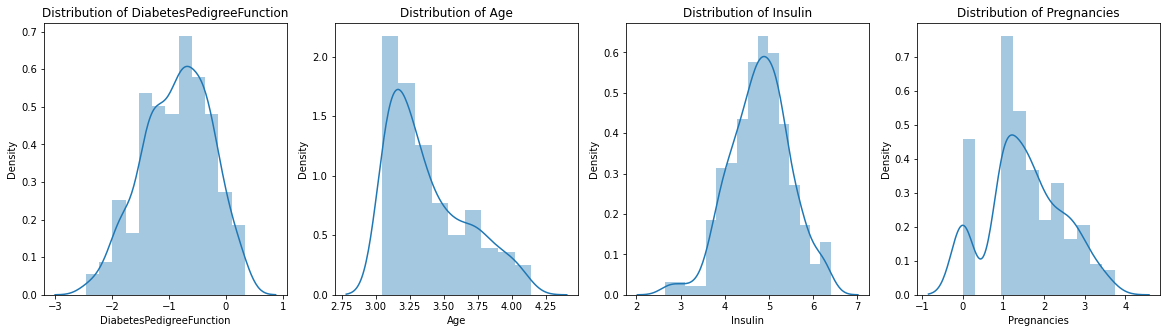

In [59]:
#Let's visualise the distribution after transformation
#used distribution plot to see the skewness of curves
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(Diab["DiabetesPedigreeFunction"])
plt.title("Distribution of DiabetesPedigreeFunction")
plt.subplot(1,4,2)
sns.distplot(Diab["Age"])
plt.title("Distribution of Age")
plt.subplot(1,4,3)
sns.distplot(Diab["Insulin"])
plt.title("Distribution of Insulin")
plt.subplot(1,4,4)
sns.distplot(Diab["Pregnancies"])
plt.title("Distribution of Pregnancies")

In [ ]:
Diab.agg(["skew"]).transpose()
# USed agg function to calculate skewness and create a array. Then used transpose function to convert the row to column

,skew
Pregnancies,0.065225
Glucose,0.517850
BloodPressure,-0.087516
SkinThickness,0.209311
Insulin,-0.199204
BMI,0.446753
DiabetesPedigreeFunction,-0.253765
Age,0.814061
Outcome,0.717990


###We used Log-transformation for Diabetes Pedigree Function ,Age and Insulin data and Square root transformation for pregnancies data.

###After perfomomg the transformation as we can see the distribution plot as well as skewness values, 

###1. Pregnancies data is normaly distributed.

###2. Diabetes Pedigree Function data is also normaly dictributed.

###3. Age data is still moderately positively skewed.

###4. Insulin data became Normaly distributed.
